In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api
import scipy.stats as stats

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pandas.read_csv('data/shipping_data.csv')
data.head()

,weight (kg),length (m),width (m),height (m),shipment date,name,destination port,price ($)
0,1.10,0.40,0.39,0.26,19/03/2023,Camera Bag,Port of Singapore (Singapore),37.66
1,0.39,0.11,0.06,0.03,21/03/2023,Portable Bluetooth Keyboard,Port of Busan (South Korea),144.65
2,0.97,0.79,0.55,0.35,25/03/2023,Large Flat Rate Box,Port of Tianjin (China),38.57
3,6.22,0.36,0.37,0.02,15/03/2023,Ceramic Tiles,Port of Shanghai (China),10.34
4,1.18,17.77,0.27,0.13,25/03/2023,Garden Hose,Port of Tianjin (China),21.63


In [3]:
# Drop rows with missing values
data = data.dropna()

# Filter the DataFrame based on the condition
subset = data[data['destination port'] == 'Port of Tokyo (Japan)']

# Take the first 500 rows from the filtered subset
subset = subset[:500]

# Print the shape of the subset
print(subset.shape)
print(subset)

(500, 8)
      weight (kg)  length (m)  width (m)  height (m) shipment date  \
14           3.63        0.41       0.30        0.26    20/03/2023   
15         216.25        0.62       0.60        0.70    24/03/2023   
16         368.33        1.12       0.92        1.38    17/03/2023   
22           1.88        0.64       0.49        0.08    19/03/2023   
24           0.91        0.12       0.34        0.18    26/03/2023   
...           ...         ...        ...         ...           ...   
2435        11.05        1.43       0.55        0.80    15/03/2023   
2442         7.80        0.51       0.48        0.47    13/03/2023   
2443         7.82        0.49       0.56        0.32    13/03/2023   
2455         0.17        0.20       0.16        0.08    27/03/2023   
2467         8.36        0.38       0.27        0.10    28/03/2023   

                              name       destination port  price ($)  
14                       Microwave  Port of Tokyo (Japan)     144.04  
15      

In [4]:
# get the data, including height and numeric representation of name
X = subset[['weight (kg)', 'length (m)', 'width (m)', 'height (m)']].values.astype(float)
X = numpy.round(X, 2)  # Round the values to two decimal points
y = subset['price ($)'].values.astype(float)

# Concatenate the name_values with X
#X = numpy.concatenate((X, name_values.reshape(-1, 1)), axis=1)
numpy.set_printoptions(suppress=True)
print(X)
print(y)
#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
# Reshape the y array to have 2D shape
y = y.reshape(-1, 1)

# Perform feature scaling on X and y
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

#4 Fitting the Support Vector Regression Model to the dataset
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
# Create your support vector regressor here
regressor = SVR(kernel='rbf', C=1000)
regressor.fit(X, y)

# Predict the target variable
y_pred = regressor.predict(X)

print(y_pred)

[[  3.63   0.41   0.3    0.26]
 [216.25   0.62   0.6    0.7 ]
 [368.33   1.12   0.92   1.38]
 ...
 [  7.82   0.49   0.56   0.32]
 [  0.17   0.2    0.16   0.08]
 [  8.36   0.38   0.27   0.1 ]]
[   144.04     94.64    104.62    256.64     10.65    342.62   1406.69
      7.98    236.04   1864.84    160.95     42.53    272.38    140.08
     15.72    310.95     88.49     43.27    919.93     47.89    122.87
     91.4     154.7      14.59     63.83     42.74   7157.01     28.11
    524.28     15.04      9.07     45.95    195.84     53.46     18.72
    364.59     14.66     65.64     17.23     19.94     35.17     73.46
    238.52 351380.96     18.81     44.5      56.11     19.62    536.52
      3.96    495.4      82.18    125.45     41.66     88.15    691.76
    174.49    513.43     59.54    961.81    242.92    187.62     17.03
     49.68     15.05     26.3     135.81    292.46      9.94    114.
     75.63     88.68    153.17    105.17      9.7      17.26    172.92
      6.53     24.88      6.1

/home/paddy/miniconda3/envs/cab420/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Define a dictionary of hyperparameters and their corresponding values
param_grid = [
  {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [0.1, 1, 10, 100, 1000], 'degree': [3, 4, 5, 6], 'kernel': ['poly']},
 ]
# Instantiate the SVR model
svr = SVR()

# Instantiate the GridSearchCV object with the necessary parameters
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Get the best parameters
best_params = grid_search.best_params_

print("Best parameters: ", best_params)

In [6]:
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf', C=1000)
regressor.fit(X,y)
#5 Predicting a new result
y_pred = regressor.predict(X)

/home/paddy/miniconda3/envs/cab420/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(500, 4)
(500,)


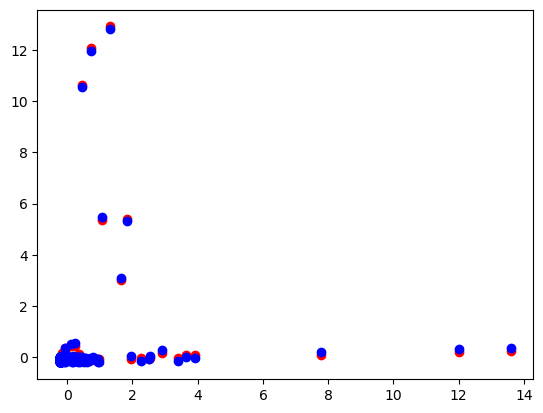

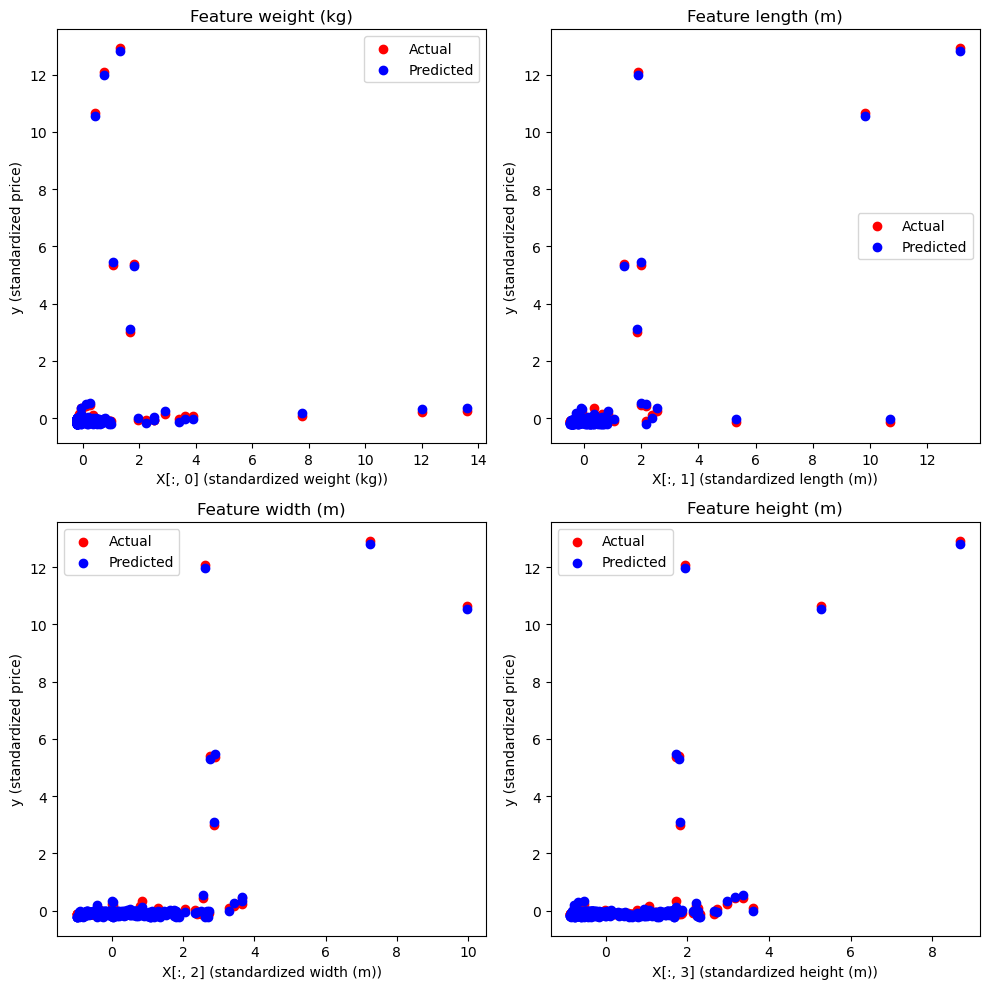

In [7]:
print(numpy.shape(X))
print(numpy.shape(y_pred))

plt.scatter(X[:, 0], y, color = 'red')  # use the first feature
plt.scatter(X[:, 0], y_pred, color = 'blue')  # plot the prediction using the first feature

features = ['weight (kg)', 'length (m)', 'width (m)', 'height (m)']

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    ax.scatter(X[:, i], y, color = 'red', label='Actual')
    ax.scatter(X[:, i], regressor.predict(X), color = 'blue', label='Predicted')
    ax.set_title(f'Feature {features[i]}')
    ax.set_xlabel(f'X[:, {i}] (standardized {features[i]})')
    ax.set_ylabel('y (standardized price)')
    ax.legend()

plt.tight_layout()
plt.show()

In [8]:
# Calculate and print the metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 0.056683793037083784
Mean Squared Error (MSE): 0.0041279659829796264
R^2 Score: 0.9958720340170204


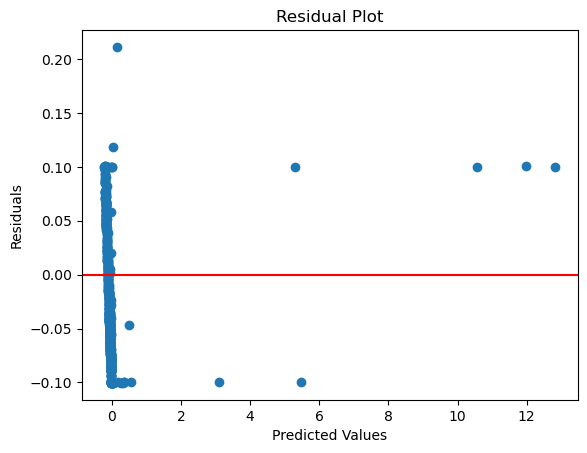

In [9]:
# Reshape y to 1 dimension (if y is a 2D array)
y = numpy.reshape(y, (y.shape[0],))

# Calculate residuals
residuals = y - y_pred

# Create a scatter plot of predicted values and residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')  # This line represents zero residual error

plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [10]:
print(y_pred)

[-0.0478781  -0.09852381 -0.01800702 -0.0509465  -0.06373793 -0.11272799
 -0.04871394 -0.11982827 -0.18540169 -0.15832739 -0.19557937 -0.0730417
 -0.14219321 -0.21083997 -0.07049502 -0.04476216 -0.21268691 -0.10524791
 -0.04934883 -0.06504999 -0.01139999 -0.09597695 -0.15591072 -0.15506529
 -0.07233463 -0.08221569  0.00405381 -0.12386187 -0.19638188 -0.03610254
 -0.16670286 -0.02444654 -0.20872594 -0.07648792 -0.12867249 -0.19223167
 -0.03602212 -0.07734022 -0.19105704 -0.02634006 -0.0359302  -0.15345674
 -0.20831959 10.55417991 -0.08770081 -0.02887646 -0.09038899 -0.06256264
 -0.05824924 -0.16237495 -0.16674391 -0.0126045  -0.03313026 -0.05946807
 -0.01243061 -0.04305078 -0.09042829 -0.19968972 -0.16523365 -0.04331885
 -0.01893159 -0.06995397 -0.04346334 -0.07724297 -0.21483206 -0.1191147
 -0.07078653 -0.04859974 -0.12243628 -0.17634463 -0.01419205 -0.06155748
 -0.06018703 -0.04999543 -0.07457654 -0.1153701  -0.05529387 -0.10117801
 -0.09444406 -0.15664445 -0.03428945 -0.03042042 -0.1